In this homework, we will analyze Bayes' theorem given by the equation:

![Bayes' theorem](Bayes_theorem.png)

The probability that a given data reading was produced by the given true signal P(s|d) is equal to the probability of getting a particular data reading given a certain true signal P(d|s) times the probability of the signal having a particular strength P(signal), divided by the probability of each data reading P(data).

In [3]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
from scipy import stats
from scipy.stats import poisson
from scipy.stats import norm

### Problem 1

First, we come up with a background (scale = 2) and signal. Then, we inject the signal into the background to get all the data. 

<ipython-input-47-9781e2edc26e>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(datacenters,signalcenters,Psd.T)


Text(0.5, 0, 'Observed data, $P(d|s)$')

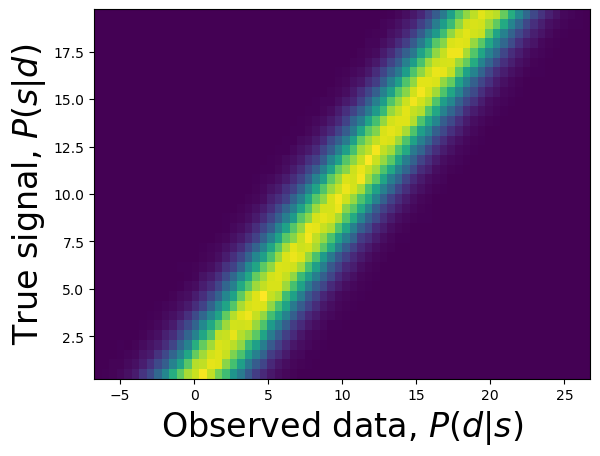

In [47]:
bkgd = stats.norm.rvs(loc = 0, scale = 2, size = 1000000)
signal = np.random.uniform(0,20,1000000)

data = bkgd + signal

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

P(d|s) is plotted along the x-axis in the above plot. I will use the technique discussed in lecture to plot the injected signal. If we select a true signal of 10, We can imagine drawing a horizontal line from true signal 10 on the y-axis and going across the graph. This will give us a distribution of the x-axis which is the observed data P(d|s).

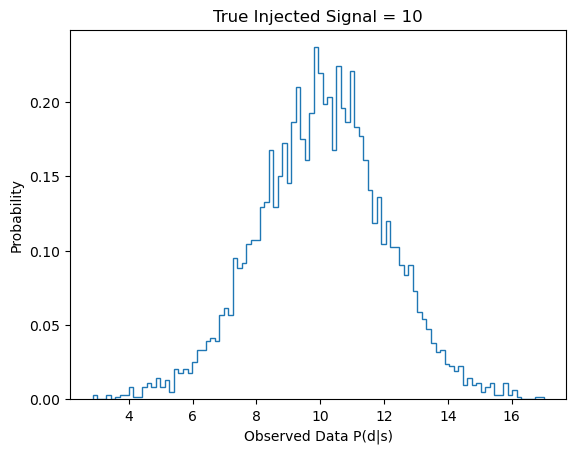

In [48]:
fig, ax = plt.subplots(1,1)
data_range1 = []
len(data)
for i in range(len(data)):
    if signal[i] <= 10.09 and signal[i] >= 10:    #true signal = 10
        data_range1.append(data[i])
plt.hist(data_range1,density = True,histtype='step',bins = 100)
ax.set_title('True Injected Signal = 10')
ax.set_ylabel('Probability')
ax.set_xlabel('Observed Data P(d|s)')
plt.show()

This plot gives the probability that we get particular data reading using true signal of 10. Now, we attempt to plot the true signal P(s|d). I will pick an observed data signal of 10 and plot True signal P(s|d) which is along the y-axis of the above histogram.

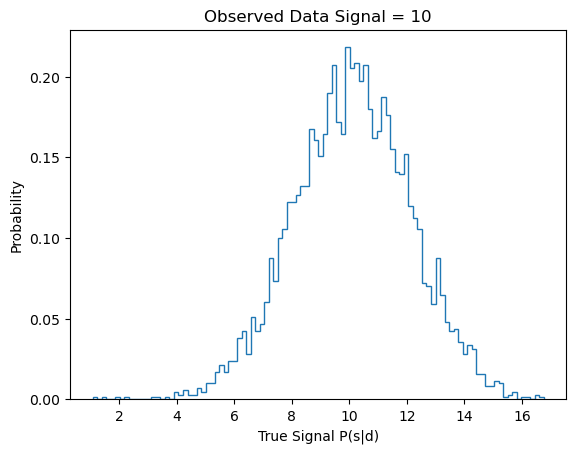

In [49]:
fig, ax = plt.subplots(1,1)
data_range2 = []
for i in range(len(data)):
    if data[i] <= 10.09 and data[i] >= 10:     #observed data = 10
        data_range2.append(signal[i])
plt.hist(data_range2,density=True,histtype='step',bins=100)
ax.set_title('Observed Data Signal = 10')
ax.set_ylabel('Probability')
ax.set_xlabel('True Signal P(s|d)')
plt.show()

This plot shows the probability of getting a certain true signal given observed data of 10

### Problem 2

<ipython-input-50-30326b886394>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(datacenters,signalcenters,Psd.T)


Text(0.5, 0, 'Observed data, $P(d|s)$')

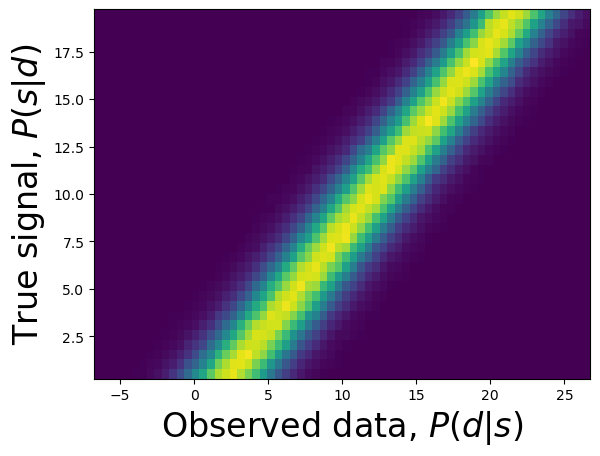

In [50]:
bkgd = stats.norm.rvs(loc = 2, scale = 2, size = 1000000)
signal = np.random.uniform(0,20,1000000)

data = bkgd + signal

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

This is very similar except now the mean is nonzero (notice the plot is shifted). The standard deviation is kept the same. I will use the same data value. Let's first plot P(d|s)

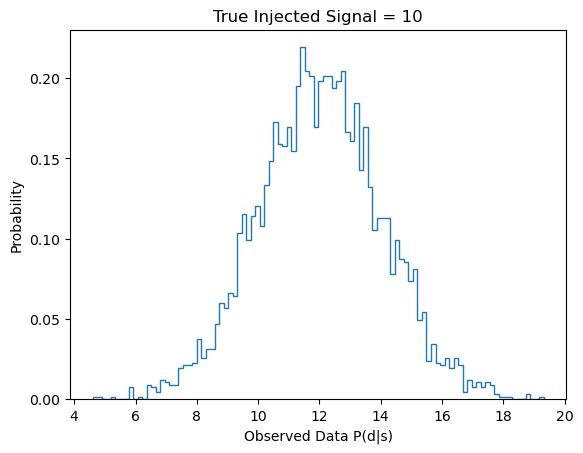

In [52]:
fig, ax = plt.subplots(1,1)
data_range3 = []
len(data)
for i in range(len(data)):
    if signal[i] <= 10.09 and signal[i] >= 10:       #true signal = 10
        data_range3.append(data[i])
plt.hist(data_range3,density = True,histtype='step',bins = 100)
ax.set_title('True Injected Signal = 10')
ax.set_ylabel('Probability')
ax.set_xlabel('Observed Data P(d|s)')
plt.show()

now we plot P(s|d)

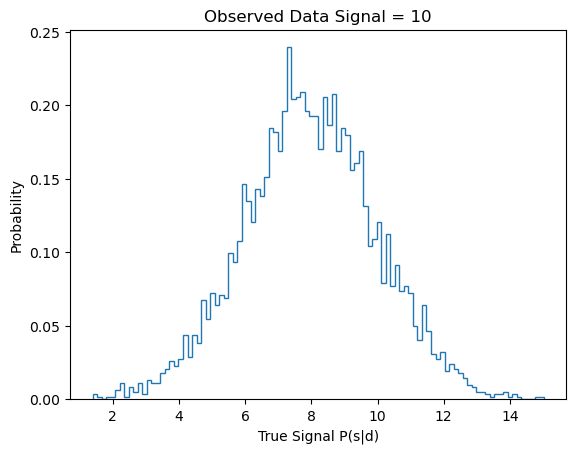

In [53]:
fig, ax = plt.subplots(1,1)
data_range4 = []
for i in range(len(data)):
    if data[i] <= 10.09 and data[i] >= 10:        #observed signal = 10
        data_range4.append(signal[i])
plt.hist(data_range4,density=True,histtype='step',bins=100)
ax.set_title('Observed Data Signal = 10')
ax.set_ylabel('Probability')
ax.set_xlabel('True Signal P(s|d)')
plt.show()

Let's now overplot the above plots to analyze the differences

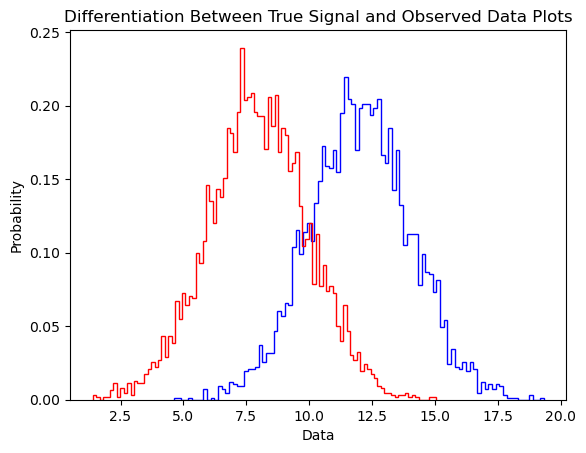

In [54]:
fig,ax = plt.subplots(1,1)
ax.hist(data_range3,density = True,histtype='step',bins = 100,color='blue')
ax.hist(data_range4,density=True,histtype='step',bins=100,color='red')
ax.set_title('Differentiation Between True Signal and Observed Data Plots')
ax.set_xlabel('Data')
ax.set_ylabel('Probability')
plt.show()

The plots are not centered on the same value because the 2d histogram above was shifted. When the mean was at 0, the plot would have been centered because the two sides of the histogram are equal. Now that the mean of the normal distribtion was shifted, the two sides are not equal anymore so the the plots are not centered.